# Dupla:
    - Victor Souza Lopes
    - Vitor Matheus de Souza Carvalho

Bibliotecas necessárias 

In [3]:
import numpy as np
import networkx as nx
from igraph import *
from tkinter import *
from functools import partial
from matplotlib import pyplot as plt 

Criação do vetor de arestas e do Grafo utilizando a biblioteca NetworkX

In [4]:
edges, G = [], nx.Graph()

Definição das funções de chamada das telas da interface criada utilizando a biblioteca TKinter. A aplicação tem duas telas: na primeira tela o usuário insere o número de nós e arestas do grafo; na segunda tela o usuário insere as especificações do grafo, no formato (custo, vértice de origem, vértice de chegada)

In [5]:
def first_screen():
    graph_main_info = Tk() 
    graph_main_info.geometry("{0}x{1}+0+0".format(graph_main_info.winfo_screenwidth(), graph_main_info.winfo_screenheight()))
    graph_main_info.title("Tópicos Especiais em Engenharia de Computação 2")
    
    lb_secondary_title = Label (graph_main_info, text="Simulação", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) 
    lb_node = Label(graph_main_info, text="Número de nós:", bg="white").place(x=110, y=130)
    lb_edge = Label(graph_main_info, text="Número de enlaces:", bg="white").place(x=110, y=180)
    
    node_qnt_input = Entry(graph_main_info, width=30, bg="white")
    node_qnt_input.place(x=110, y=150)
    
    edge_qnt_input = Entry(graph_main_info, width=30, bg="white")
    edge_qnt_input.place(x=110, y=200)
    
    bt_confirm = Button(graph_main_info, width=10, bg="white", text="Confirmar", command=partial(second_screen_transition, graph_main_info, node_qnt_input, edge_qnt_input)).place(x=275, y=230)
    graph_main_info.mainloop()

def second_screen_transition(previous_screen, node_qnt, edge_qnt):
    second_screen(previous_screen, int(node_qnt.get()), int(edge_qnt.get()))
    
def second_screen(previous_screen, node_qnt, edge_qnt):
    graph_specs = Tk()
    graph_specs.geometry("{0}x{1}+0+0".format(graph_specs.winfo_screenwidth(), graph_specs.winfo_screenheight())) 
    graph_specs.title("Tópicos Especiais em Engenharia de Computação 2") 
    
    lb_secondary_title = Label (graph_specs, text="Simulação Parte 2", fg= "orange", bg="white", font=["Verdana", 16]).pack(pady=50) 
    
    dist_vector = []
    lb_A_vector = []
    lb_B_vector = []

    for i in range(1, int(edge_qnt) + 1):
        dist_input = Entry(graph_specs, width=30, bg="white")
        dist_input.place(x=110, y=20*i + 150)
        dist_vector.append(dist_input)
        
        lb_A_input = Entry(graph_specs, width=30, bg="white")
        lb_A_input.place(x=310, y=20*i + 150)
        lb_A_vector.append(lb_A_input)
        
        lb_B_input = Entry(graph_specs, width=30, bg="white")
        lb_B_input.place(x=510, y=20*i + 150)
        lb_B_vector.append(lb_B_input)
        
    bt_confirm = Button (graph_specs, width=20, text="Cadastrar", command = partial(process_graph_info, graph_specs, node_qnt, edge_qnt, dist_vector, lb_A_vector, lb_B_vector), bg="white").pack() 
    previous_screen.destroy()
    
    
def process_graph_info(previous_screen, node_qnt, edge_qnt, dist_vector, lb_A_vector, lb_B_vector):
    processed_dists = []
        
    for d in dist_vector:
        processed_dists.append(int(d.get()))
        
    newtwork = Graph(node_qnt)
    newtwork.es['weight'] = processed_dists
    
    ascii_default_value = ord('a')
    for i in range(edge_qnt):
        u = ord(lb_A_vector[i].get()) - ascii_default_value
        v = ord(lb_B_vector[i].get()) - ascii_default_value
        w = processed_dists[i]
        
        newtwork.add_edge(u, v)
        edges.append((u, v, w))
    
    create_graph(node_qnt, G)
    previous_screen.destroy()
    
def create_graph(node_qnt, G):    
    for e in edges:
        G.add_edge(e[0], e[1], weight = e[2])

def print_path(G, u, v):
    print(nx.shortest_path(G, u, v))

def minimum_cost(path, G):
    ans = 0
    
    for i in range(len(path)-1):
        u, v = path[i], path[i+1]
        
        ans += G.adj[u][v]['weight']
    
    return ans

def print_graph(G):
    pos=nx.spring_layout(G)
    nx.draw(G,pos)
    labels = nx.get_edge_attributes(G,'weight')
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
    
    x = plt.savefig('graph')
    

Função principal que chama a interface

In [6]:
if __name__ == "__main__":
    first_screen()

Imagem do grafo gerado pela entrada do usuário. Para efeito de exemplo, foi utilizado o grafo da atividade 8

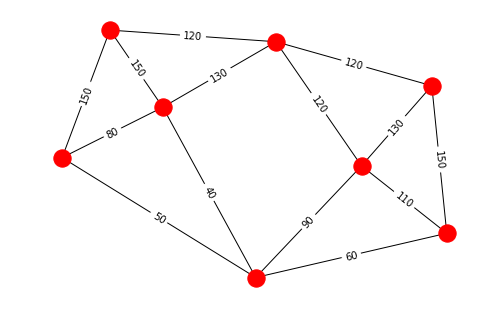

In [7]:
print_graph(G)

N pares de vértices aleatórios de acordo com o Grafo criado com o custo mínimo e percurso

In [10]:
from random import randrange

n, size = randrange(0, G.size()), G.number_of_nodes()
for i in range(n):
    u, v = randrange(0, size), randrange(0, size)
    
    print('Minimum Cost from', u, 'to', v, ':', minimum_cost(nx.shortest_path(G, u, v), G))
    
    print('Path: ', end='')
    print_path(G, u, v)

Minimum Cost from 6 to 1 : 170
Path: [6, 3, 1]
Minimum Cost from 7 to 0 : 260
Path: [7, 2, 1, 0]
Minimum Cost from 5 to 4 : 240
Path: [5, 6, 4]
Minimum Cost from 6 to 0 : 210
Path: [6, 3, 0]
Minimum Cost from 1 to 0 : 50
Path: [1, 0]
Minimum Cost from 2 to 6 : 230
Path: [2, 4, 6]
Minimum Cost from 0 to 3 : 80
Path: [0, 3]
Minimum Cost from 4 to 5 : 240
Path: [4, 6, 5]
Minimum Cost from 0 to 7 : 260
Path: [0, 1, 2, 7]
Minimum Cost from 5 to 2 : 260
Path: [5, 0, 1, 2]
